<a href="https://colab.research.google.com/github/bmurmann/Ngspice-on-Colab/blob/main/notebooks/SKY130_VGS_sweep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SKY130 V<sub>GS</sub> sweep

# Tool setup

In [8]:
# install conda
import os
CONDA_PREFIX = os.environ.get('CONDA_PREFIX', None)
if not CONDA_PREFIX:
  !python -m pip install condacolab
  import condacolab
  condacolab.install()

# install sky130a
!conda install -c litex-hub open_pdks.sky130a

# install ngspice
!conda install -c conda-forge ngspice

✨🍰✨ Everything looks OK!
Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done


==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.10.0



# All requested packages already installed.

Solving environment: | / - \ | / - \ | / - \ | / - \ done


==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.10.0



# All requested packages already installed.



# Simulation

In [9]:
%%writefile .spiceinit
* ngspice initialization for sky130
* assert BSIM compatibility mode with "nf" vs. "W"
set ngbehavior=hsa
* "nomodcheck" speeds up loading time
set ng_nomodcheck

Overwriting .spiceinit


In [10]:
%%writefile netlist.spice
* PMOS VGS sweep
.lib "/usr/local/share/pdk/sky130A/libs.tech/ngspice/sky130.lib.spice" tt
X1 vdp vgp 0 vbp sky130_fd_pr__pfet_01v8_hvt w=10 l=0.15
vsdp     0  vdp        dc 0.9
vsgp     0  vgp        dc 0
vsbp     0  vbp        dc 0
.end

.control
save all @m.X1.msky130_fd_pr__pfet_01v8_hvt[id] @m.X1.msky130_fd_pr__pfet_01v8_hvt[gm]
dc vsgp 0 1.8 0.01
display
wrdata output.txt @m.X1.msky130_fd_pr__pfet_01v8_hvt[gm] @m.X1.msky130_fd_pr__pfet_01v8_hvt[id]
.endc

Overwriting netlist.spice


In [11]:
!ngspice -b -r output.raw netlist.spice


Note: Compatibility modes selected: hs a



Circuit: * pmos vgs sweep

option SCALE: Scale is set to 1e-06 for instance and model parameters
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

 Reference value :  0.00000e+00
No. of Data Rows : 181
Here are the vectors currently active:

Title: * pmos vgs sweep
Name: dc1 (DC transfer characteristic)
Date: Mon Dec  4 17:22:17  2023

    @m.x1.msky130_fd_pr__pfet_01v8_hvt[gm]: admittance, real, 181 long
    @m.x1.msky130_fd_pr__pfet_01v8_hvt[id]: current, real, 181 long
    m.x1.msky130_fd_pr__pfet_01v8_hvt#body: voltage, real, 181 long
    m.x1.msky130_fd_pr__pfet_01v8_hvt#dbody: voltage, real, 181 long
    m.x1.msky130_fd_pr__pfet_01v8_hvt#sbody: voltage, real, 181 long
    v-sweep             : voltage, real, 181 long [default scale]
    vbp                 : voltage, real, 181 long
    vdp                 : voltage, real, 181 long
    vgp                 : voltage, real, 181 long
    vsbp#branch         : current, real, 181 long

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("output.txt", delim_whitespace=True, header=None)
df.columns = ["vsg", "gm", "vsg1", "id"]
df['gm_id'] = df['gm']/df['id']
df

,vsg,gm,vsg1,id,gm_id
0,0.00,2.328096e-13,0.00,8.300220e-15,28.048613
1,0.01,3.081805e-13,0.01,1.098758e-14,28.048077
2,0.02,4.079487e-13,0.02,1.454494e-14,28.047462
3,0.03,5.400098e-13,0.03,1.925391e-14,28.046753
4,0.04,7.148136e-13,0.04,2.548724e-14,28.045938
...,...,...,...,...,...
176,1.76,1.866207e-03,1.76,1.113010e-03,1.676721
177,1.77,1.869115e-03,1.77,1.131687e-03,1.651619
178,1.78,1.871750e-03,1.78,1.150391e-03,1.627056
179,1.79,1.874116e-03,1.79,1.169121e-03,1.603013


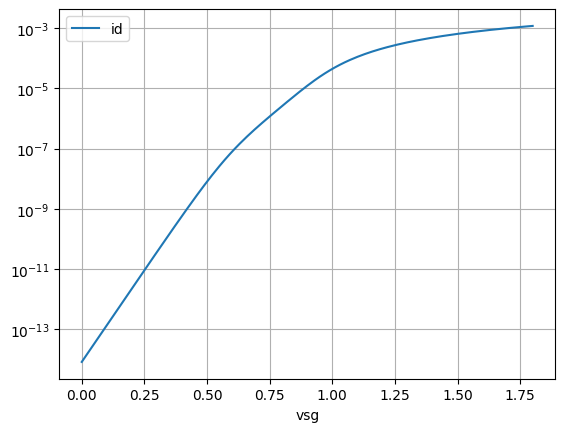

In [13]:
df.plot(x="vsg", y="id", logy=True, grid=True)
plt.show()

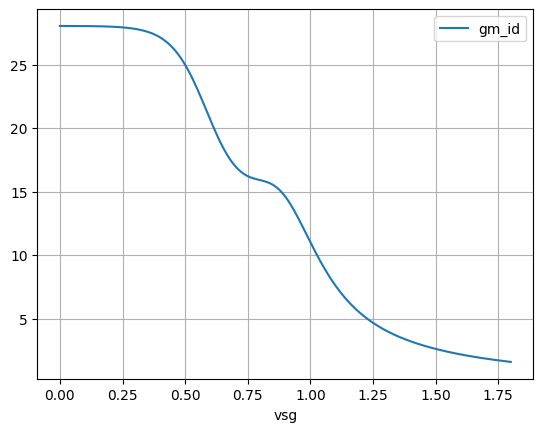

In [14]:
df.plot(x="vsg", y="gm_id", grid=True)
plt.show()

The above plot shows a problem with the PMOS model in the SKY130 PDK.